In [41]:
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
player_list = ["Alex", "Alina", "Evelyn", "Christopher", "Manu", "Natalie", "Sebastian", "Vero", "Viki", "Wolfgang"]

In [43]:
# load

scores_DF = pd.read_csv("data/scoring.csv")


In [44]:
df_data = player_list.copy()
df_data.append("Week")
scores_DF[df_data].groupby("Week").count().sum().to_list()

Alex           276
Alina          252
Evelyn         276
Christopher    272
Manu           215
Natalie        259
Sebastian      269
Vero           276
Viki           221
Wolfgang       273
dtype: int64

In [63]:
player_DF = pd.read_csv("data/playoff_view.csv")
player_DF["Playoff Vorab"] = pd.read_csv("data/playoffResults.csv").transpose()[0].to_list()
player_DF = player_DF.drop([4,7])
player_DF["Abgegebene Tipps"] = scores_DF[df_data].groupby("Week").count().sum().to_list()
player_DF["Punkte pro Tipp"] = player_DF["Regular Season Points"]/player_DF["Abgegebene Tipps"]
player_DF

,Players,Gesamtpunkte,Regular Season Points,Wildcard Games,Divisional Round,Conference Finals,Superbowl,Playoff Vorab,Abgegebene Tipps,Punkte pro Tipp
0,Alex,215,203,8,4,0,0,18,276,0.735507
1,Alina,196,184,10,2,0,0,16,252,0.730159
2,Evelyn,223,213,6,4,0,0,16,276,0.771739
3,Christopher,211,197,8,6,0,0,18,272,0.724265
5,Manu,118,116,0,2,0,0,0,215,0.539535
6,Natalie,189,183,6,0,0,0,18,259,0.706564
8,Sebastian,183,173,6,4,0,0,16,269,0.643123
9,Vero,192,180,10,2,0,0,14,276,0.652174
10,Viki,148,144,0,4,0,0,10,221,0.651584
11,Wolfgang,216,204,8,4,0,0,16,273,0.747253


In [65]:
weeklyScores_DF = scores_DF.groupby("Week", as_index=False).sum()
weeklyScores_DF = weeklyScores_DF.drop("Game Nr.", axis=1)
weeklyScores_DF.loc[weeklyScores_DF["Week"]==1]

,Week,score_Alex,score_Alina,score_Evelyn,score_Christopher,score_Ludwig,score_Manu,score_Natalie,score_Nikolai,score_Sebastian,score_Vero,score_Viki,score_Wolfgang
0,1.0,12,12,12,12,10,0,11,8,11,10,8,13


# Boxplot

         Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                      |-----:-----|
      o      |--------|     :     |--------|    o  o
                      |-----:-----|
     flier            <----------->            fliers
                          IQR

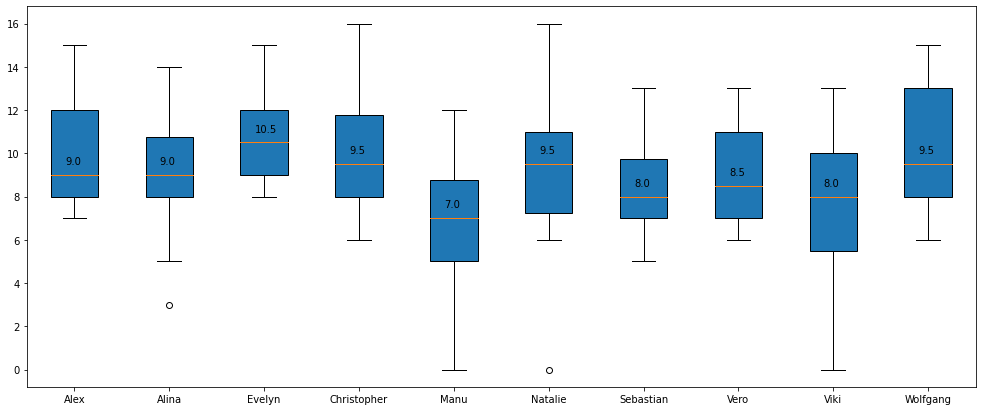

In [66]:
plotdata = weeklyScores_DF[:-1].copy()
plotdata = plotdata.drop("Week", axis=1)
plotdata = plotdata.drop("score_Ludwig", axis=1)
plotdata = plotdata.drop("score_Nikolai", axis=1)


fig, ax = plt.subplots(figsize=(17,7))

bplot = ax.boxplot(plotdata, patch_artist=True)
ax.set_xticklabels(player_list)
for i, player in enumerate(player_list):
    score_median = bplot["medians"][i].get_ydata()[0]
    # ax.annotate("Median:", xy=((i+0.8),score_median*1.06))
    ax.annotate(score_median, xy=((i+0.9),score_median+0.5))
plt.show()

In [49]:
plotdata.describe()

,score_Alex,score_Alina,score_Evelyn,score_Christopher,score_Manu,score_Natalie,score_Sebastian,score_Vero,score_Viki,score_Wolfgang
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000,18.000000
mean,10.055556,9.055556,10.777778,9.722222,6.444444,9.00000,8.555556,8.944444,7.444444,10.222222
std,2.412522,2.645134,2.129776,2.492472,3.551673,3.37813,1.916560,2.312936,4.090480,2.602161
min,7.000000,3.000000,8.000000,6.000000,0.000000,0.00000,5.000000,6.000000,0.000000,6.000000
25%,8.000000,8.000000,9.000000,8.000000,5.000000,7.25000,7.000000,7.000000,5.500000,8.000000
50%,9.000000,9.000000,10.500000,9.500000,7.000000,9.50000,8.000000,8.500000,8.000000,9.500000
75%,12.000000,10.750000,12.000000,11.750000,8.750000,11.00000,9.750000,11.000000,10.000000,13.000000
max,15.000000,14.000000,15.000000,16.000000,12.000000,16.00000,13.000000,13.000000,13.000000,15.000000


In [50]:

bplot = ax.boxplot(weeklyScores_DF, patch_artist=True)
ax.set_xticklabels(player_list)


plt.show()

ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of ticklabels (10).